In [1]:
"""Module imports"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

seed = 42

In [2]:
"""Train/test/validation data preparation for label_3"""

# For the sake of my current sanity the model does NOT have any strings in it

df = pd.read_csv('training_data.csv')
df = df.drop(columns=['title', 'label_7']) # no label_7 here
df['stock_id'] = LabelEncoder().fit_transform(df['stock'])
df = df.drop(columns=['stock'])

df = df.sort_values(['stock_id', 'date'])
df['prev_close'] = df.groupby('stock_id')['close'].shift(1)
df = df.drop(columns=['date'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

def sort_by_stock_and_time(df, train_size = 0.7, val_size = 0.15, test_size = 0.15):
    train_stocks = []
    val_stocks = []
    test_stocks = []

    for stock in df['stock_id'].unique():
        stock_df = df[df['stock_id'] == stock]
        n = len(stock_df)
        train_end = int(n * train_size)
        val_end = int(n * val_size)
        test_end = int(n * test_size)
        
        train_stocks.append(stock_df.iloc[:train_end])
        val_stocks.append(stock_df.iloc[train_end:train_end + val_end])
        test_stocks.append(stock_df.iloc[train_end + val_end:])
        
    train_df = pd.concat(train_stocks).reset_index(drop=True)
    val_df = pd.concat(val_stocks).reset_index(drop=True)
    test_df = pd.concat(test_stocks).reset_index(drop=True)
    
    return train_df, val_df, test_df

train_df, val_df, test_df = sort_by_stock_and_time(df)

# Separate features and target for each set
X_train = train_df.drop(columns=['label_3'])
y_train = train_df['label_3']

X_val = val_df.drop(columns=['label_3'])
y_val = val_df['label_3']

X_test = test_df.drop(columns=['label_3'])
y_test = test_df['label_3']

In [3]:
"""Logistic Regression, solver = 'sag', penalty = 'l2', max_iter=2000, random_state=seed, class_weight is unbalanced for now"""

model = LogisticRegression(solver = 'sag', penalty='l2', max_iter=2000, random_state = seed)

model.fit(X_train, y_train)

# Calculate training accuracy and error 
tr_err = 1 - model.score(X_train, y_train)
tr_acc = model.score(X_train, y_train)

# Calculate validation accuracy and error
val_acc = model.score(X_val, y_val)  # Accuracy on validation set
val_err = 1 - val_acc  

# Calculate testing accuracy and error
test_acc = model.score(X_test, y_test)  
test_err = 1 - test_acc  

/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [13]:
"""Preparing data for confusion matrix"""
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)
labels = ['buy', 'hold', 'sell']

Label 3 Training Accuracy:0.7441254259701948
Label 3 Training Error:0.2558745740298052


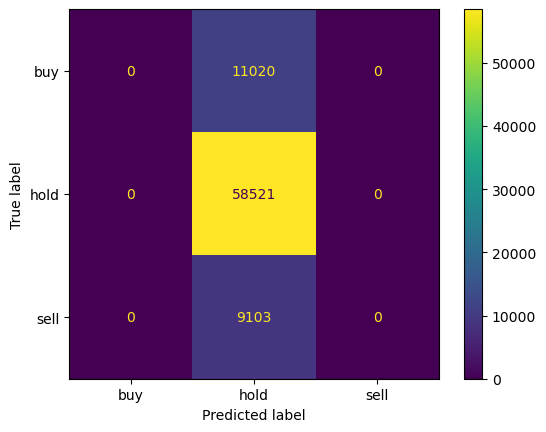

In [9]:
print(f'Label 3 Training Accuracy:{tr_acc}')
print(f'Label 3 Training Error:{tr_err}')
cm_train = metrics.confusion_matrix(y_train, y_train_pred, labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = labels).plot()

Label 3 Validation Accuracy:0.7739926959228881
Label 3 Validation Error:0.2260073040771119


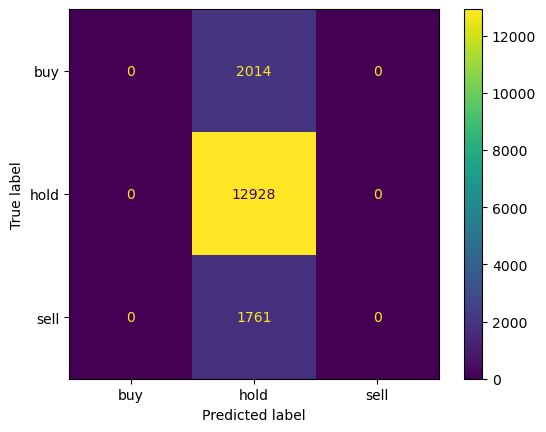

In [10]:
print(f'Label 3 Validation Accuracy:{val_acc}')
print(f'Label 3 Validation Error:{val_err}')
cm_val = metrics.confusion_matrix(y_val, y_val_pred, labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_val, display_labels = labels).plot()

Label 3 Test Accuracy:0.77665797856936
Label 3 Test Error:0.22334202143063997


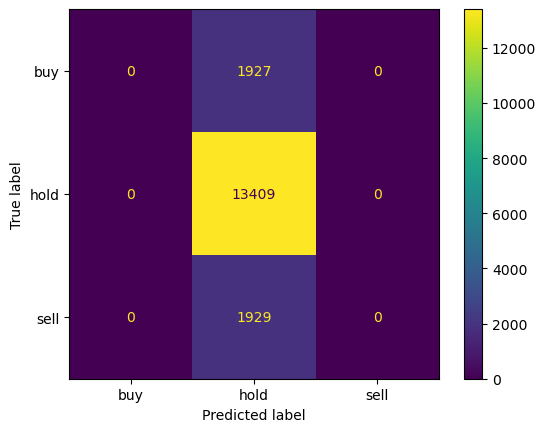

In [14]:
print(f'Label 3 Test Accuracy:{test_acc}')
print(f'Label 3 Test Error:{test_err}')
cm_val = metrics.confusion_matrix(y_test, y_test_pred, labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_val, display_labels = labels).plot()

In [16]:
"""Train/test/validation data preparation for label_7"""

# For the sake of my current sanity the model does NOT have any strings in it

df = pd.read_csv('training_data.csv')
df = df.drop(columns=['title', 'label_3']) # no label_3 here
df['stock_id'] = LabelEncoder().fit_transform(df['stock'])
df = df.drop(columns=['stock'])

df = df.sort_values(['stock_id', 'date'])
df['prev_close'] = df.groupby('stock_id')['close'].shift(1)
df = df.drop(columns=['date'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

def sort_by_stock_and_time(df, train_size = 0.7, val_size = 0.15, test_size = 0.15):
    train_stocks = []
    val_stocks = []
    test_stocks = []

    for stock in df['stock_id'].unique():
        stock_df = df[df['stock_id'] == stock]
        n = len(stock_df)
        train_end = int(n * train_size)
        val_end = int(n * val_size)
        test_end = int(n * test_size)
        
        train_stocks.append(stock_df.iloc[:train_end])
        val_stocks.append(stock_df.iloc[train_end:train_end + val_end])
        test_stocks.append(stock_df.iloc[train_end + val_end:])
        
    train_df = pd.concat(train_stocks).reset_index(drop=True)
    val_df = pd.concat(val_stocks).reset_index(drop=True)
    test_df = pd.concat(test_stocks).reset_index(drop=True)
    
    return train_df, val_df, test_df

train_df, val_df, test_df = sort_by_stock_and_time(df)

# Separate features and target for each set
X_train = train_df.drop(columns=['label_7'])
y_train = train_df['label_7']

X_val = val_df.drop(columns=['label_7'])
y_val = val_df['label_7']

X_test = test_df.drop(columns=['label_7'])
y_test = test_df['label_7']

In [17]:
"""Logistic Regression, solver = 'sag', penalty = 'l2', max_iter=2000, random_state=seed, class_weight is unbalanced for now"""

model = LogisticRegression(solver = 'sag', penalty='l2', max_iter=2000, random_state = seed)

model.fit(X_train, y_train)

# Calculate training accuracy and error 
tr_err = 1 - model.score(X_train, y_train)
tr_acc = model.score(X_train, y_train)

# Calculate validation accuracy and error
val_acc = model.score(X_val, y_val)  # Accuracy on validation set
val_err = 1 - val_acc  

# Calculate testing accuracy and error
test_acc = model.score(X_test, y_test)  
test_err = 1 - test_acc 

/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [22]:
"""Preparing data for confusion matrix"""
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)
labels = ['buy', 'hold', 'sell']

Label 7 Training Accuracy:0.6562484105589746
Label 7 Training Error:0.34375158944102535


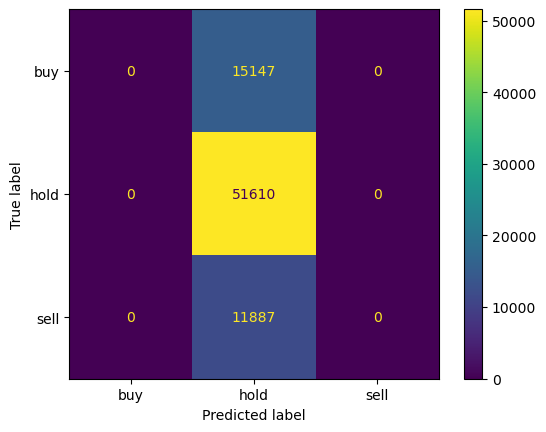

In [23]:
print(f'Label 7 Training Accuracy:{tr_acc}')
print(f'Label 7 Training Error:{tr_err}')
cm_train = metrics.confusion_matrix(y_train, y_train_pred, labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = labels).plot()

Label 7 Validation Accuracy:0.6842483386218045
Label 7 Validation Error:0.31575166137819555


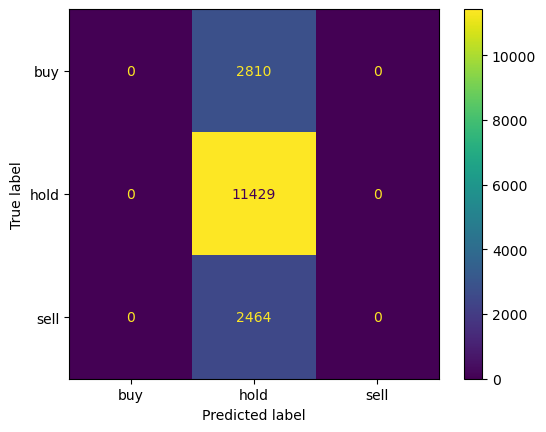

In [24]:
print(f'Label 7 Validation Accuracy:{val_acc}')
print(f'Label 7 Validation Error:{val_err}')
cm_val = metrics.confusion_matrix(y_val, y_val_pred, labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_val, display_labels = labels).plot()

Label 7 Test Accuracy:0.7005502461627571
Label 7 Test Error:0.2994497538372429


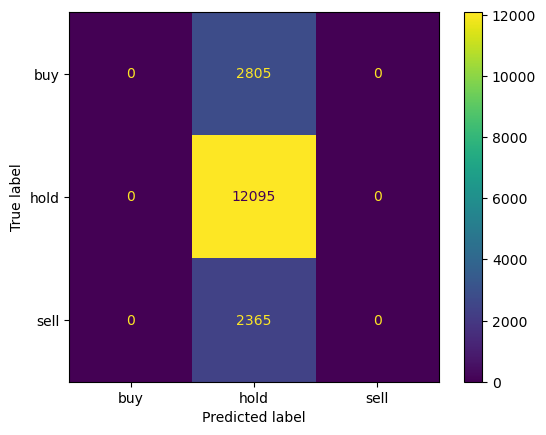

In [25]:
print(f'Label 7 Test Accuracy:{test_acc}')
print(f'Label 7 Test Error:{test_err}')
cm_val = metrics.confusion_matrix(y_test, y_test_pred, labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_val, display_labels = labels).plot()

In [26]:
"""Logistic Regression, solver = 'sag', penalty = 'l2', max_iter=2000, random_state=seed, class_weight is unbalanced for now"""

model = LogisticRegression(solver = 'sag', penalty='l2', max_iter=2000, random_state = seed, class_weight='balanced')

model.fit(X_train, y_train)

# Calculate training accuracy and error 
tr_err = 1 - model.score(X_train, y_train)
tr_acc = model.score(X_train, y_train)

# Calculate validation accuracy and error
val_acc = model.score(X_val, y_val)  # Accuracy on validation set
val_err = 1 - val_acc  

# Calculate testing accuracy and error
test_acc = model.score(X_test, y_test)  
test_err = 1 - test_acc 

/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Label 7 Training Accuracy:0.19260210569147043
Label 7 Training Error:0.8073978943085296


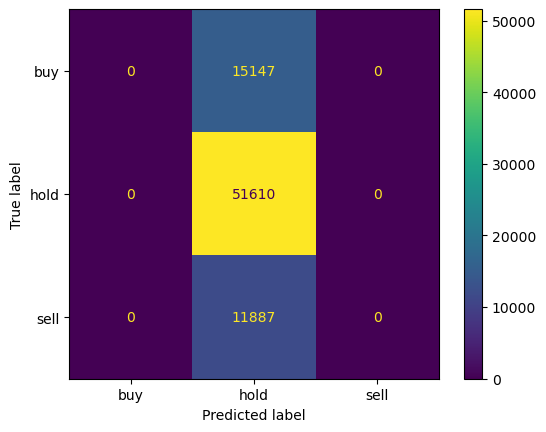

In [27]:
print(f'Label 7 Training Accuracy:{tr_acc}')
print(f'Label 7 Training Error:{tr_err}')
cm_train = metrics.confusion_matrix(y_train, y_train_pred, labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = labels).plot()

Label 7 Validation Accuracy:0.16823325151170448
Label 7 Validation Error:0.8317667484882956


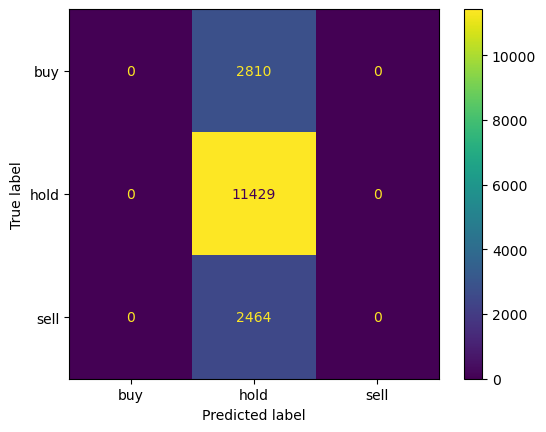

In [28]:
print(f'Label 7 Validation Accuracy:{val_acc}')
print(f'Label 7 Validation Error:{val_err}')
cm_val = metrics.confusion_matrix(y_val, y_val_pred, labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_val, display_labels = labels).plot()

Label 7 Test Accuracy:0.16246741963509992
Label 7 Test Error:0.8375325803649001


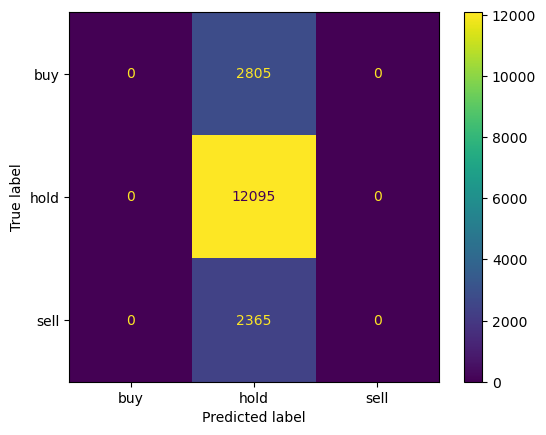

In [29]:
print(f'Label 7 Test Accuracy:{test_acc}')
print(f'Label 7 Test Error:{test_err}')
cm_val = metrics.confusion_matrix(y_test, y_test_pred, labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_val, display_labels = labels).plot()